In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
funding_data = pd.read_csv("Funding Data.csv")

for index, row in funding_data.iterrows():
    for col in funding_data.columns:
        if funding_data.at[index, col] == "*" or funding_data.at[index, col] == "**" or funding_data.at[index, col] == "---":
            funding_data.at[index, col] = np.nan

for col in funding_data.columns[1:]:
    funding_data[col] = funding_data[col].astype("float")

cancertypes = list(set(list(funding_data["Unnamed: 0"])))

In [3]:
funding_data["Medicare Spend$ (millions)"].sum()

18214.0

In [4]:
funding_data["AYLL"].sum()

359.30999999999995

In [5]:
funding_data["NCI Funding (millions)"].sum()

2811.2

In [6]:
funding_data["YLLPI"].sum()

138.25999999999996

In [7]:
funding_data["percentage"] = funding_data["NCI Funding (millions)"] / funding_data["NCI Funding (millions)"].sum()
funding_data["ratio fund/yll"] = funding_data["NCI Funding (millions)"] / funding_data["AYLL"]
funding_data

,Unnamed: 0,Incidence,Mort.,US Gov't YLL (thousands),WHO DALY (thousands),Medicare Spend$ (millions),National spend $ (billions),Lost prod. (billions),NCI Funding (millions),AYLL,YLLPI,percentage,ratio fund/yll
0,Bladder,70530.0,14680.0,154.4,128.7,1023.0,3.466,1.977,22.6,10.52,2.19,0.008039,2.148289
1,"Brain, ONS",22020.0,13140.0,290.8,NaN,293.0,3.715,5.851,193.1,22.13,13.21,0.068690,8.725712
2,Breast,209060.0,40230.0,761.3,612.5,1375.0,13.886,10.879,631.2,18.92,3.64,0.224530,33.361522
3,Cervix,12200.0,4210.0,104.7,114.1,73.0,1.425,1.808,76.5,24.87,8.58,0.027213,3.075995
4,Colon/rectum,142570.0,51370.0,764.6,542.1,3101.0,12.155,12.802,270.4,14.88,5.36,0.096187,18.172043
5,Esophogus,16640.0,14500.0,214.2,122.0,386.0,1.071,NaN,30.5,14.77,12.87,0.010849,2.064997
6,Hogkin lymph.,8490.0,1320.0,29.8,288.7,1350.0,10.168,0.829,14.6,22.58,3.51,0.005194,0.646590
7,Kidney,58240.0,13040.0,195.7,NaN,685.0,3.058,3.633,90.0,15.01,3.36,0.032015,5.996003
8,Leukemia,43050.0,21840.0,355.2,210.5,695.0,4.507,5.880,295.8,16.26,8.25,0.105222,18.191882
9,Liver,24120.0,18910.0,292.2,137.8,278.0,NaN,4.638,72.6,15.45,12.11,0.025825,4.699029


In [8]:
funding_data["NCI Funding (millions)"].sum()

2811.2

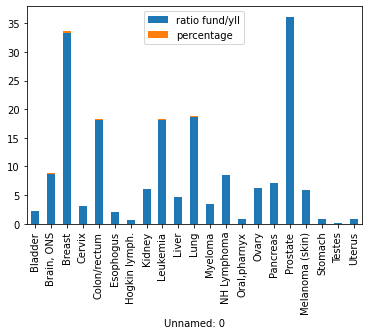

In [9]:
funding_data.plot(x="Unnamed: 0", y=["ratio fund/yll", "percentage"], kind="bar", stacked=True)

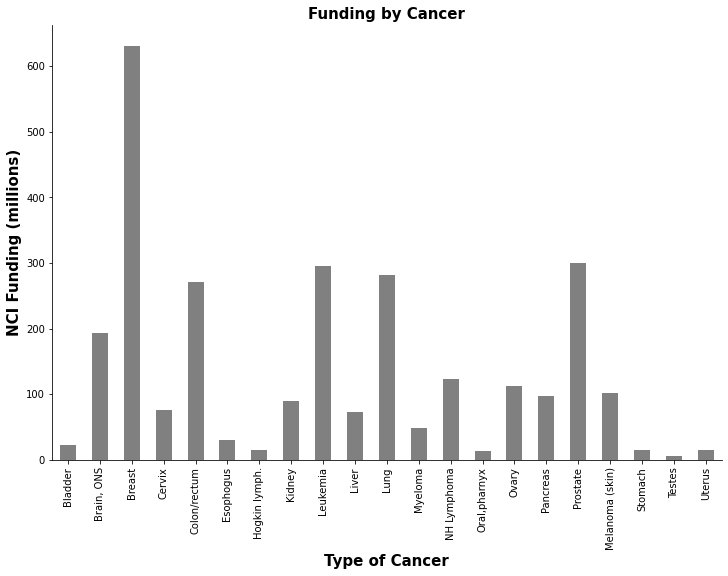

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
funding_data.plot(ax=ax, x="Unnamed: 0", y="NCI Funding (millions)", kind="bar", legend=False, color="grey")
plt.xlabel("Type of Cancer", size=15, fontweight="bold")
plt.ylabel("NCI Funding (millions)", size=15, fontweight="bold")
plt.title("Funding by Cancer", size=15, fontweight="bold")
ax.get_figure().savefig("allfund.svg", bbox_inches="tight")

In [11]:
top5=["Breast", "Colon/rectum", "Leukemia", "Lung", "Prostate"]

In [12]:
spending=["Medicare Spend$ (millions)", "National spend $ (billions)", "NCI Funding (millions)"]
newspending=["NCI Funding", "Medicare Spending", "National spend $ (billions)"]

In [13]:
fund = funding_data[["Unnamed: 0"]+spending].set_index("Unnamed: 0")
fund["Medicare Spending"] = fund["Medicare Spend$ (millions)"]/1000
fund["NCI Funding"] = fund["NCI Funding (millions)"] / 1000
fund

,Medicare Spend$ (millions),National spend $ (billions),NCI Funding (millions),Medicare Spending,NCI Funding
Unnamed: 0,,,,,
Bladder,1023.0,3.466,22.6,1.023,0.0226
"Brain, ONS",293.0,3.715,193.1,0.293,0.1931
Breast,1375.0,13.886,631.2,1.375,0.6312
Cervix,73.0,1.425,76.5,0.073,0.0765
Colon/rectum,3101.0,12.155,270.4,3.101,0.2704
Esophogus,386.0,1.071,30.5,0.386,0.0305
Hogkin lymph.,1350.0,10.168,14.6,1.350,0.0146
Kidney,685.0,3.058,90.0,0.685,0.0900
Leukemia,695.0,4.507,295.8,0.695,0.2958


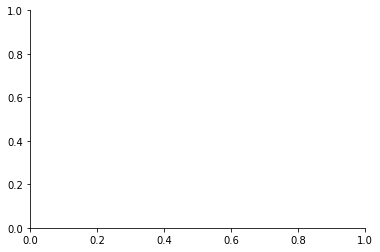

In [14]:
fig, ax = plt.subplots()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#fund[newspending].plot(ax=ax, kind="bar", stacked=True, figsize=(10,7), color=["lightgrey", "grey", "red"], edgecolor="black")

In [15]:
newfunding= pd.DataFrame()
for i in range(len(funding_data)):
    if funding_data.iloc[i]["Unnamed: 0"] in top5:
        newfunding[funding_data.iloc[i]["Unnamed: 0"]] = funding_data.iloc[i]
newfunding=newfunding.T

In [16]:
plotdf = newfunding[spending]
plotdf = plotdf.astype(float)

In [17]:
plotdf["Medicare Spending"] = plotdf["Medicare Spend$ (millions)"]/1000
plotdf["NCI Funding"] = plotdf["NCI Funding (millions)"] / 1000

In [18]:
plotdf["NCI Funding (millions)"].sum()/funding_data["NCI Funding (millions)"].sum()

0.6331104154809335

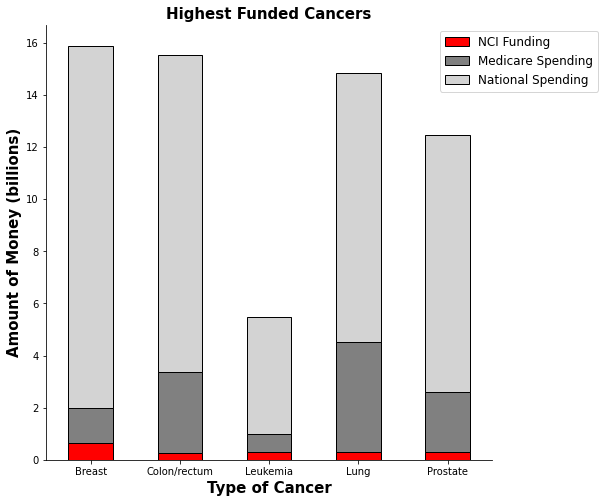

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plotdf[newspending].plot(ax=ax, kind="bar", stacked=True, color=["red", "grey", "lightgrey"], edgecolor="black")
L = plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1),fontsize=12)
L.get_texts()[2].set_text('National Spending')
plt.xlabel("Type of Cancer", size=15, fontweight="bold")
plt.ylabel("Amount of Money (billions)", size=15, fontweight="bold")
plt.title("Highest Funded Cancers", size=15, fontweight="bold")
plt.xticks(rotation=0)
ax.get_figure().savefig("topfund.svg", bbox_inches="tight")